# Chest Xray for Pneumonia detection 

The project is done using Transfer Learning with VGG16 model   

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.models import Model
# from glob import glob

# Visualizing Data

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(dir_path):
    """
    Plots random images of the classes from the folders.
    Edit the variable path for different use cases. 
    """

    path = '/content/drive/MyDrive/Chest X-Ray Images (Pneumonia)/'
    
    folder = path + dir_path 

    random_image = random.sample(os.listdir(folder), 1)
    print(random_image)

    img = mpimg.imread(folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(dir_path.split('/')[1])
    plt.axis('off')

    print(f'Image shape: {img.shape}')

    return img

['IM-0654-0001.jpeg']
Image shape: (1519, 1790)
['person80_virus_150.jpeg']
Image shape: (880, 1248)


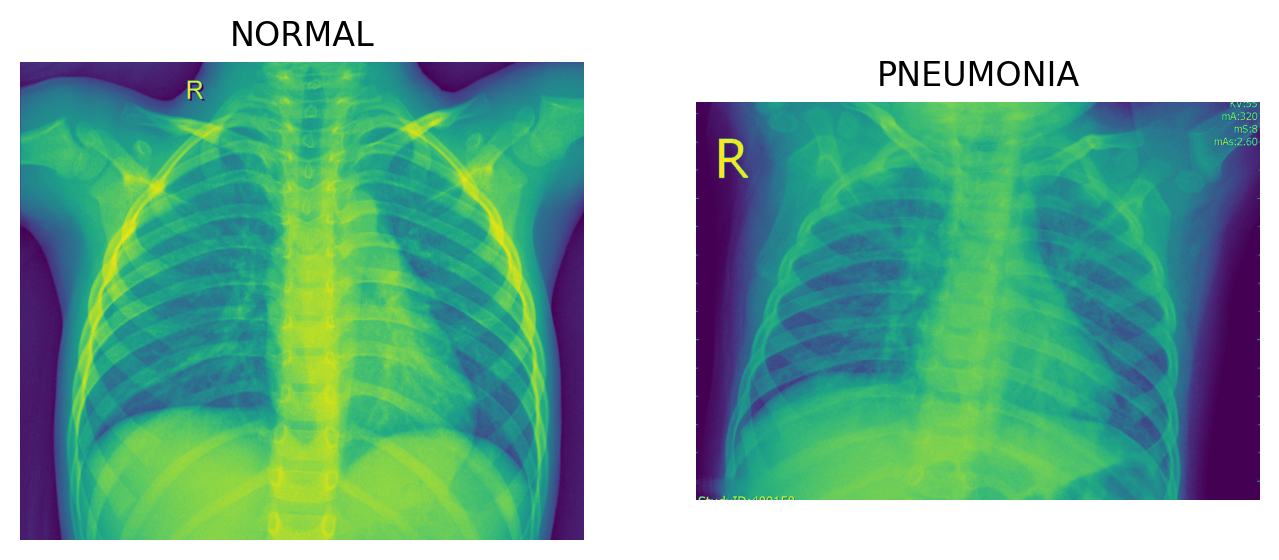

In [163]:
plt.figure(figsize=(8, 8), dpi=200)
plt.subplot(1, 2, 1)
normal = view_random_image('train/NORMAL')
plt.subplot(1, 2, 2)
pneumonia = view_random_image('train/PNEUMONIA')

# Augmenting Data

In [14]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = '/content/drive/MyDrive/Chest X-Ray Images (Pneumonia)/train'
test_dir = '/content/drive/MyDrive/Chest X-Ray Images (Pneumonia)/test'

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             horizontal_flip=True,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMAGE_SIZE,
                                                                   batch_size=BATCH_SIZE,
                                                                   class_mode='categorical')

train_datagen = ImageDataGenerator(rescale = 1./255)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Visualizing Augmented Images

In [45]:
def view_augmented_image(true_data, augmented_data):

    images, labels = true_data.next()
    augmented_images, augmented_labels = augmented_data.next()

    random_image = random.randint(0, 31)
    
    fig = plt.figure(figsize=(8, 8), dpi=200)

    # Plot True Images
    fig.add_subplot(1, 2, 1)
    plt.imshow(images[random_image])
    plt.title('True Image')
    plt.axis(False)
    
    # Plot augmented images
    fig.add_subplot(1, 2, 2)
    plt.imshow(augmented_images[random_image])
    plt.title('Augmented Image')
    plt.axis(False)

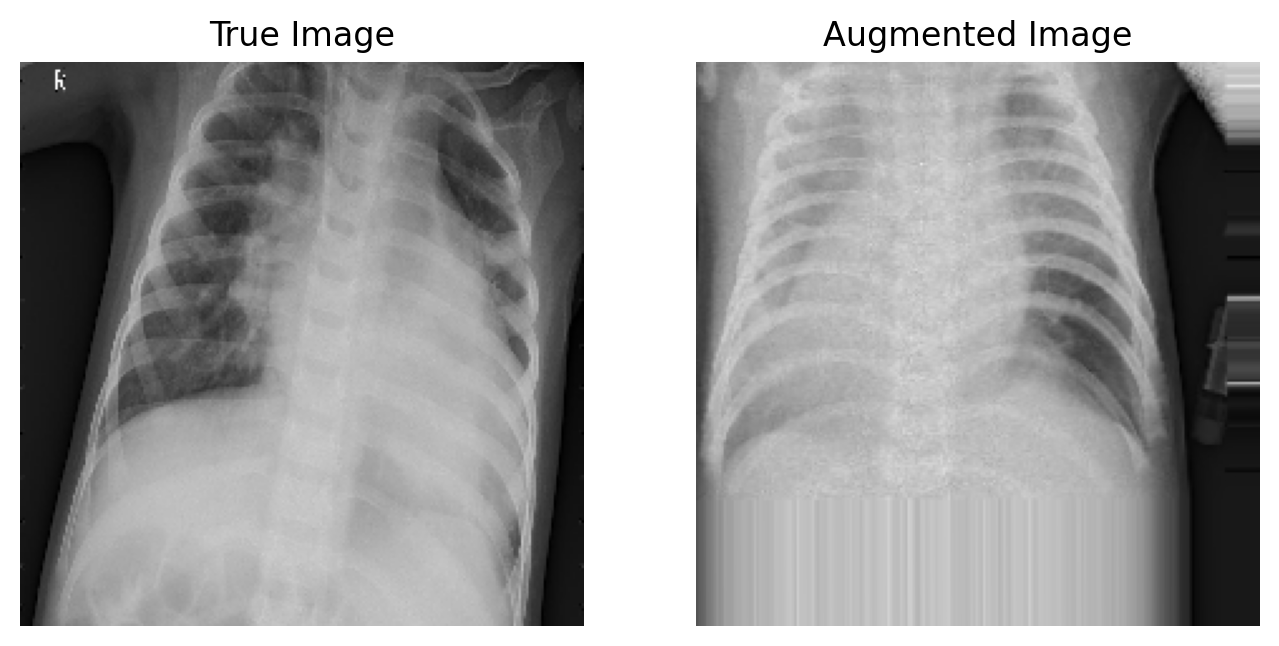

In [46]:
view_augmented_image(train_data, train_data_augmented)

# Getting model ready!

In [47]:
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input

vgg = VGG16(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)
vgg.trainable=False

In [48]:
x = Flatten()(vgg.output)

outputs = Dense(2, activation='softmax')(x)

model_1 = Model(inputs=vgg.input, outputs=outputs)

In [49]:
model_1.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [50]:
history_1 = model_1.fit_generator(train_data, 
                                      epochs=10,
                                      steps_per_epoch=len(train_data),
                                      validation_data=test_data,
                                      validation_steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
163/163 [==============================] - 455s 3s/step - loss: 0.1197 - accuracy: 0.9511 - val_loss: 0.9529 - val_accuracy: 0.7244
Epoch 2/10
163/163 [==============================] - 85s 524ms/step - loss: 0.0493 - accuracy: 0.9812 - val_loss: 0.7633 - val_accuracy: 0.8061
Epoch 3/10
163/163 [==============================] - 84s 513ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.7375 - val_accuracy: 0.8045
Epoch 4/10
163/163 [==============================] - 84s 512ms/step - loss: 0.0170 - accuracy: 0.9965 - val_loss: 1.1014 - val_accuracy: 0.7468
Epoch 5/10
163/163 [==============================] - 83s 507ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 1.0605 - val_accuracy: 0.7644
Epoch 6/10
163/163 [==============================] - 97s 593ms/step - loss: 0.0099 - accuracy: 0.9981 - val_loss: 0.8649 - val_accuracy: 0.7933
Epoch 7/10
163/163 [==============================] - 83s 508ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.6849 - val_accu

In [51]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """ 
    import matplotlib.pyplot as plt
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

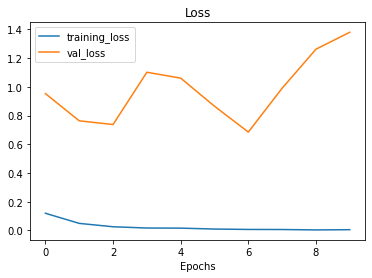

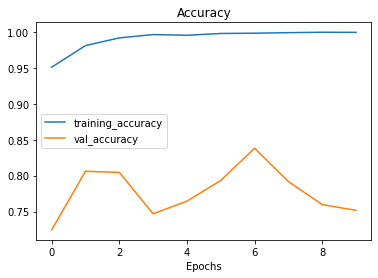

In [52]:
plot_loss_curves(history_1)

In [133]:
model_1.save('/content/drive/MyDrive/Chest X-Ray Images (Pneumonia)/chest_xray_pneumonia.h5')

In [134]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Chest X-Ray Images (Pneumonia)/chest_xray_pneumonia.h5')
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# Making predictions

In [53]:
class_names = ['NORMAL', 'PNEUMONIA']
class_names

['NORMAL', 'PNEUMONIA']

In [172]:
import numpy as np

def make_prediction(model, path, img_shape=224, class_names=class_names):
    
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.

    pred = model.predict(tf.expand_dims(img, axis=0))
    
    max_value = np.max(pred[0])
    max_index = np.where(pred[0] == max_value)

    pred_class = class_names[max_index[0][0]]

    plt.imshow(img)
    plt.title(f'Prediction: {pred_class} with {np.max(pred[0])*100 :.2f}% accuracy')
    plt.axis(False)

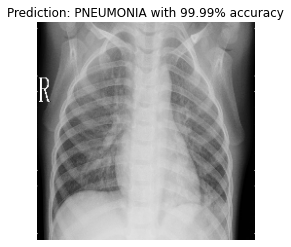

In [175]:
make_prediction(model_1, '/content/drive/MyDrive/Chest X-Ray Images (Pneumonia)/val/PNEUMONIA/person1950_bacteria_4881.jpeg')